## Remake Sample to crroect affinity (and take log value)

In [98]:
## Load sample data
# load data
import pandas as pd
import os 
os.getcwd()
os.chdir('/mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate')
pdb_sample = pd.read_csv('pdb_kd_004_sample.csv')
pdb_sample

,Num,PDB_code,ligand,affinity_nM
0,308,1dar,GDP,0.011000
1,14061,5etp,5RZ,0.000700
2,12943,5ct1,NHE,0.000030
3,12760,4urx,HXY,0.000001
4,4509,3bva,2NC,0.000300
...,...,...,...,...
95,16776,6epz,MLB,0.000072
96,6396,3p2e,SAH,0.000600
97,17022,6fba,D48,0.019900
98,16760,6ma5,J9V,0.000008


In [101]:
pdb_sample['affinity_nM']

0     0.011000
1     0.000700
2     0.000030
3     0.000001
4     0.000300
        ...   
95    0.000072
96    0.000600
97    0.019900
98    0.000008
99    0.000045
Name: affinity_nM, Length: 100, dtype: float64

In [104]:
import pandas as pd

os.chdir('/mnt/ailon/pdb_test')
pdb = pd.read_csv('pdb_kd_samp_matching.csv')

In [105]:
pdb

,Num,PDB_code,ligand,affinity_nM
0,1,4cpa,GLY,5.0
1,6,1rnt,2GP,6500.0
2,8,4ts1,TYR,11600.0
3,14,4fab,FLU,8.8
4,25,8abp,GLA/GLB,10.0
...,...,...,...,...
4497,17364,6bmi,SER,9000.0
4498,17365,6d50,GCB,9000.0
4499,17366,6exi,ADN,9000.0
4500,17670,6d28,NEC,200.0


In [108]:
tmp = []
for i in range(len(pdb_sample)):
    for j in range(len(pdb)):
        if pdb_sample['PDB_code'][i] == pdb['PDB_code'][j]:
            pdb_sample['affinity_nM'][i] = pdb['affinity_nM'][j]
#            tmp.append(pdb['affinity_nM'][j])
#            print(pdb_sample['affinity'][i])
        else:
            pass

/home/ailon/anaconda3/envs/dgraphdta/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [109]:
pdb_sample

,Num,PDB_code,ligand,affinity_nM
0,308,1dar,GDP,1.100000e+04
1,14061,5etp,5RZ,7.000000e+02
2,12943,5ct1,NHE,3.020000e-05
3,12760,4urx,HXY,1.300000e+06
4,4509,3bva,2NC,3.000000e+02
...,...,...,...,...
95,16776,6epz,MLB,7.200000e+01
96,6396,3p2e,SAH,6.000000e+02
97,17022,6fba,D48,1.990000e+04
98,16760,6ma5,J9V,8.000000e+00


In [112]:
import numpy as np

pdb_sample['affinity_nM'] = [-np.log10(y / 1e9) for y in pdb_sample['affinity_nM']]

In [113]:
pdb_sample

,Num,PDB_code,ligand,affinity_nM
0,308,1dar,GDP,4.958607
1,14061,5etp,5RZ,6.154902
2,12943,5ct1,NHE,13.519993
3,12760,4urx,HXY,2.886057
4,4509,3bva,2NC,6.522879
...,...,...,...,...
95,16776,6epz,MLB,7.142668
96,6396,3p2e,SAH,6.221849
97,17022,6fba,D48,4.701147
98,16760,6ma5,J9V,8.096910


In [118]:
# save the corrected 'pdb_sample' 

os.getcwd()

'/mnt/ailon/pdb_test'

In [119]:
pdb_sample.to_csv('pdb_sample_1109.csv', header = True, index = False)

## Make ligand's smiles 

In [120]:
tmp = pd.read_csv('pdb_sample_1109.csv')

In [121]:
tmp

,Num,PDB_code,ligand,affinity_nM
0,308,1dar,GDP,4.958607
1,14061,5etp,5RZ,6.154902
2,12943,5ct1,NHE,13.519993
3,12760,4urx,HXY,2.886057
4,4509,3bva,2NC,6.522879
...,...,...,...,...
95,16776,6epz,MLB,7.142668
96,6396,3p2e,SAH,6.221849
97,17022,6fba,D48,4.701147
98,16760,6ma5,J9V,8.096910


In [137]:
# search mol2 file

mol2_path = '/mnt/ailon/pdb_test/mol2/'
mol_list = []
for pdb_code in tmp['PDB_code']:
    mol_list.append(os.path.join(mol2_path + pdb_code + '_ligand.mol2'))

In [138]:
len(mol_list)

100

In [139]:
mol_list[0:5]

['/mnt/ailon/pdb_test/mol2/1dar_ligand.mol2',
 '/mnt/ailon/pdb_test/mol2/5etp_ligand.mol2',
 '/mnt/ailon/pdb_test/mol2/5ct1_ligand.mol2',
 '/mnt/ailon/pdb_test/mol2/4urx_ligand.mol2',
 '/mnt/ailon/pdb_test/mol2/3bva_ligand.mol2']

In [144]:
# Test for making Ligand Smiles
import rdkit
from rdkit import Chem
from rdkit.Chem import MolFromSmiles

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

a = rdkit.Chem.rdmolfiles.MolFromMol2File(mol_list[1])
mol_list[1]

print(a)


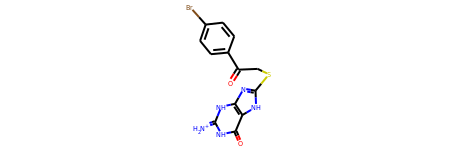

In [145]:
a

In [146]:
b = Chem.MolToSmiles(a)
b = Chem.MolToSmiles(a,isomericSmiles=False)
b

'[NH2+]=c1[nH]c(=O)c2[nH]c(SCC(=O)c3ccc(Br)cc3)nc2[nH]1'

In [148]:
# Get Smiles from mol2 if it is possible to change mol2 in Rdkit

availableList = []
drugs = []

for i in range(len(mol_list)):
    try:
        mol2 = Chem.MolFromMol2File(mol_list[i])
        if mol2 != None:
            availableList.append(mol_list[i])
            drugs.append(Chem.MolFromMol2File(mol_list[i]))
    except:
        molTmp = mol_list[i].split('/')[5]
        print(molTmp)
        pass
            



1jou_ligand.mol2
4lz9_ligand.mol2
04-Oct_ligand.mol2


RDKit WARNING: [09:47:46] 1dar_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 2lko_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 3qx8_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 3b82_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 5wrs_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 5lvd_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 5eom_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 2fsv_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 1ex8_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 1ucn_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 2nsl_ligand: warning - O.co2 with non C.2 or S.o2 neighbor.
RDKit WARNING: [09:47:46] 5z68_ligand: warning - O.co2

In [149]:
len(drugs)

77

In [151]:
len(availableList)

77

In [159]:
sampleA = availableList[0:5]

In [160]:
sampleD = drugs[0:5]

In [168]:
# Make ligand dictionary: {pdb_code: smiles}
sampleAPdbCode = []

for i in sampleA:
     sampleAPdbCode.append(i.split('/')[5][0:4])


len(sampleAPdbCode)

5

In [169]:
drugSmiles = []
for i in sampleD:
    drugSmiles.append(Chem.MolToSmiles(i,isomericSmiles=False))
len(drugSmiles)

5

In [170]:
# Make dictionary form

ligand_dic = {}
for sampleAPdbCode, drugSmiles in zip (sampleAPdbCode, drugSmiles):
    ligand_dic[sampleAPdbCode] = drugSmiles

In [171]:
ligand_dic

{'5etp': '[NH2+]=c1[nH]c(=O)c2[nH]c(SCC(=O)c3ccc(Br)cc3)nc2[nH]1',
 '5ct1': 'O=S(=O)([O-])CC[NH2+]C1CCCCC1',
 '4urx': 'Brc1ccc(C[NH+]2CC=CC2)cc1',
 '3bva': 'CCCCC(C[NH2+]C(CCCC)C(=O)NC(CCC(N)=O)C(=O)NC(CCCNC(N)=[NH2+])C(N)=O)NC(=O)C(NC(=O)C(NC(C)=O)C(C)O)C(C)CC',
 '4qsv': 'Cc1cn(C2CC(O)C(CO)O2)c(=O)[nH]c1=O'}

In [172]:
# save ligand_dic

import json

os.chdir('/mnt/ailon/pdb_test/1109')
with open('ligand_can.txt', 'w') as f:
    f.write(json.dumps(ligand_dic))

## Make Protein sequence 

In [177]:
# Test for PDBParser
import os
os.chdir('/mnt/ailon/pdb_test/Library_v201013')


import PDBParser
pdbParser = PDBParser.PDBParser()

target = pdbParser.load_pdb('3lpl', '../PDB/')
#source = pdbParser.load_pdb('H1081_2VYC-coot-1', './input/')

tprotein = target.getProtein()
#sprotein = source.getProtein()

tseq = tprotein.extractSequence('A')
#sseq = sprotein.extractSequence('A')

print(target)
print(tprotein)
print(tseq)

ISNYINTIPVEEQPEYPGNLELERRIRSAIRWNAIMTVLRASKKDLELGGHMASFQSSATIYDVCFNHFFRARNEQDGGDLVYFQGHISPGVYARAFLEGRLTQEQLDNFRQEVHGNGLSSYPHPKLMPEFWQFPTVSMGLGPIGAIYQAKFLKYLEHRGLKDTSKQTVYAFLGDGEMDEPESKGAITIATREKLDNLVFVINCNLQRLDGPVTGNGKIINELEGIFEGAGWNVIKVMWGSRWDELLRKDTSGKLIQLMNETVDGDYQTFKSKDGAYVREHFFGKYPETAALVADWTDEQIWALNRGGHDPKKIYAAFKKAQETKGKATVILAHTIKGYGMGDAAMDGVRHIRDRFNVPVSDADIEKLPYITFPEGSEEHTYLHAQRQKLHGYLPSRQPNFTEKLELPSLQDFGALLEEQSKEISTTIAFVRALNVMLKNKSIKDRLVPIIADEARTFGMEGLFRQIGIYSPEDEKGQILQEGINALGAGCSWLAAATSYSTNNLPMIPFYIYYSMFGFQRIGDLCWAAGDQQARGFLIGGTSGRTTLNGEGLQHEDGHSHIQSLTIPNCISYDPAYAYEVAVIMHDGLERMYGEKQENVYYYITTLNENYHMPAMPEGAEEGIRKGIYKLETIEGSKGKVQLLGSGSILRHVREAAEILAKDYGVGSDVYSVTSFTELARDGQDCERWNMLHPLETPRVPYIAQVMNDAPAVASTDYMKLFAEQVRTYVPADDYRVLGTDGFGRSDSRENLRHHFEVDASYVVVAALGELAKRGEIDKKVVADAIAKFNIDADKVNPRLA


In [180]:
# load data
import pandas as pd
import os

os.chdir('/mnt/ailon/pdb_test')
pdb_sample = pd.read_csv('pdb_sample_1109.csv')

In [183]:
# Define 
pdb_code = pdb_sample['PDB_code']
pdb_code

0     1dar
1     5etp
2     5ct1
3     4urx
4     3bva
      ... 
95    6epz
96    3p2e
97    6fba
98    6ma5
99    6ma4
Name: PDB_code, Length: 100, dtype: object

In [184]:
# load ligand sample

os.chdir('/mnt/ailon/pdb_test/1109')

with open('ligand_can.txt', 'r') as f:
    ligandSample = json.load(f)


In [193]:
sampleP = []

for i in ligandSample.keys():
    for j in pdb_sample['PDB_code']:
        if i == j:
            sampleP.append(j)
        else:
            pass

In [195]:
sampleP

['5etp', '5ct1', '4urx', '3bva', '4qsv']

In [213]:
# Make protein sequence data as a dictionary type 
import os
import PDBParser

os.chdir('/mnt/ailon/pdb_test/Library_v201013')

pro_dic = {}
pro_seqs = []
for i in sampleP:
    try:
        pdbParser = PDBParser.PDBParser()
        target = pdbParser.load_pdb(i, '../PDB/')
        tprotein = target.getProtein()
        tseq = tprotein.extractSequence('A')
        pro_seqs.append(tseq)
        pro_dic[i] = tseq
    except: #for 4urx # look for other ways to process protein with other chains
        pdbParser = PDBParser.PDBParser()
        target = pdbParser.load_pdb(i, '../PDB/')
        tprotein = target.getProtein()
        tseq = tprotein.extractSequence('R')
        pro_seqs.append(tseq)
        pro_dic[i] = tseq
        print(i)
        

4urx


In [214]:
pro_dic

{'5etp': 'AMTVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLGPQDQPDYLNAAVALETSLAPEELLNHTQRIELQQGRVRKAERWGPRTLDLDIMLFGNEVINTERLTVPHYDMKNRGFMLWPLFEIAPELVFPDGEMLRQILHTRAFDKLNKW',
 '5ct1': 'TIHEFKKSAKTTLIKIDPALKIKTKKVNTADQCANRCTRNKGLPFTCKAFVFDKARKQCLWFPFNSMSSGVKKEFGHEFDLYENKDYIRNCIIGKGRSYKGTVSITKSGIKCQPWSSMIPHEHSFLPSSYRGKDLQENYCRNPRGEEGGPWCFTSNPEVRYEVCDIPQCSEVE',
 '4urx': 'HMTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQH',
 '3bva': 'PQITLWKRPLVTIKIGGQLKEALLNTGADDTVIEEMSLPGRWKPKMIGGIGGFIKVRQYDQIIIEIAGHKAIGTVLVGPTPVNIIGRNLLTQIGATLNF',
 '4qsv': 'SMQEEDTFRELRIFLRNVTHRLAIDKRFRVFTKPVDPDEVPDYVTVIKQPMDLSSVISKIDLHKYLTVKDYLRDIDLICSNALEYNPDRDPGDRLIRHRACALRDTAYAIIKEELDEDFEQLCEEIQESR'}

In [215]:
# save protein with code and sequence as a dictionary type
import os 
import json

os.chdir('/mnt/ailon/pdb_test/1109')

with open('proteins.txt', 'w') as f:
    json.dump(pro_dic, f)

In [226]:
os.chdir('/mnt/ailon/pdb_test/1109')

with open('proteins.txt', 'r') as f:
    proteinSample = json.load(f)

In [228]:
proteinSample

{'5etp': 'AMTVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLGPQDQPDYLNAAVALETSLAPEELLNHTQRIELQQGRVRKAERWGPRTLDLDIMLFGNEVINTERLTVPHYDMKNRGFMLWPLFEIAPELVFPDGEMLRQILHTRAFDKLNKW',
 '5ct1': 'TIHEFKKSAKTTLIKIDPALKIKTKKVNTADQCANRCTRNKGLPFTCKAFVFDKARKQCLWFPFNSMSSGVKKEFGHEFDLYENKDYIRNCIIGKGRSYKGTVSITKSGIKCQPWSSMIPHEHSFLPSSYRGKDLQENYCRNPRGEEGGPWCFTSNPEVRYEVCDIPQCSEVE',
 '4urx': 'HMTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQH',
 '3bva': 'PQITLWKRPLVTIKIGGQLKEALLNTGADDTVIEEMSLPGRWKPKMIGGIGGFIKVRQYDQIIIEIAGHKAIGTVLVGPTPVNIIGRNLLTQIGATLNF',
 '4qsv': 'SMQEEDTFRELRIFLRNVTHRLAIDKRFRVFTKPVDPDEVPDYVTVIKQPMDLSSVISKIDLHKYLTVKDYLRDIDLICSNALEYNPDRDPGDRLIRHRACALRDTAYAIIKEELDEDFEQLCEEIQESR'}

In [218]:
sampleP

['5etp', '5ct1', '4urx', '3bva', '4qsv']

In [219]:
os.getcwd()

'/mnt/ailon/pdb_test/1109'

In [224]:
## Make Lists for aln, a3m, hhr, npy files  

for i in sampleP:
    with open ('sampleList.csv', 'a') as f:
        f.write(i + '\n')

In [231]:
### Make fasta faile for aln, a3m, hhr, npy files  
for i in proteinSample.keys():
    with open (i+'.fasta', 'w') as f:
        f.write('>'+ i + '\n' + proteinSample[i])   

In [ ]:
## Work HHblits 
- fasta_test.sh
- sampleList.csv
- hhblits.sh
- ./bin/hhblits
- aln_gen_v2.py

In [ ]:
# Make directory for aln, a3m, hhr, npy files 
in terminal 

mkdir aln
mkdir a3m
mkdir hhr
mkdir pconsc4

In [ ]:
# Seperate files 

in terminal

$ mv /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/seq/*.aln /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/aln/

$ mv /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/seq/*.a3m /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/a3m/

$ mv /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/seq/*.hhr /mnt/ailon/pdb_test/pdb_sample_work/make_kd_candidate/hhr/

In [241]:
## Make affinity file

sampleAffinity = [] 
for i in sampleP:
    for j in range(len(pdb_sample)):
        if i == pdb_sample['PDB_code'][j]:
            sampleAffinity.append(pdb_sample['affinity_nM'][j])
        else:
            pass

In [242]:
sampleAffinity

[6.154901959985742,
 13.51999305704285,
 2.886056647693163,
 6.522878745280337,
 2.0]

In [244]:
## Sample affinity Matrix 

# make matrix array shape 

import numpy as np

matrix_5 = [[0 for x in range(5)] for x in range(5)]
matrix_array = np.array(matrix_5, dtype=np.float64)
matrix_array.shape

(5, 5)

In [246]:
# Take affinity value in matrix array
for i in range(len(sampleAffinity)):
    matrix_array[i][i] = sampleAffinity[i]

In [247]:
matrix_array

array([[ 6.15490196,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 13.51999306,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.88605665,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  6.52287875,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.        ]])

In [248]:
# Check the saved path
os.getcwd()

'/mnt/ailon/pdb_test/1109'

In [249]:
# save affinity data 
import pickle
with open('Y.txt', 'wb') as f:
    pickle.dump(matrix_array, f)
    
# Check the saved path
os.getcwd()

'/mnt/ailon/pdb_test/1109'

In [252]:
# load affinity data 
with open('Y.txt','rb') as f:
    data = pickle.load(f)

In [253]:
data

array([[ 6.15490196,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 13.51999306,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.88605665,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  6.52287875,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.        ]])

In [8]:
import json

with open('/mnt/ailon/pdb_test/1109/data/data_pdb/proteins.txt', 'r') as f:
    proteinSample = json.load(f)
    
tmp = [] 
for i in proteinSample.keys():
    tmp.append(i)
    
tmp

['5etp', '5ct1', '4urx', '3bva', '4qsv']

In [6]:
os.chdir('/mnt/ailon/pdb_test/Library_v201013')

import numpy as np
import timeit
import PDBParser

pdbParser = PDBParser.PDBParser()

for i in tmp:
    comp = pdbParser.load_pdb(i, '../1109/data/data_pdb')
# comp = pdbParser.load_pdb('4MOM')
# comp1 = pdbParser.load_pdb('1GM5-ADP-A-1756')
# comp2 = pdbParser.load_pdb('1NMD-ATP-A-401')

# ligandList1 = comp1.getLigandList()
# ligandList2 = comp2.getLigandList()
    protein = comp.getProtein()
# ligands = comp.getLigandList()
# elements = comp.getElementList()

# distmap = comp.getDistancemap(drawflag=True)
    contmap = protein.getContactmap(drawflag=False)
    np.save('/mnt/ailon/pdb_test/1109/data/data_pdb/pconsc4/' + i +'.npy', np.array(contmap))